(ligand_binding)=
# Ligand binding

Usually one or more of the transitions in a receptor model involve [ligand binding](https://en.wikipedia.org/wiki/Ligand_(biochemistry)).  For example,
consider a receptor model with two sequential transitions that involve ligand binding.

(ligands:three_state_model)=

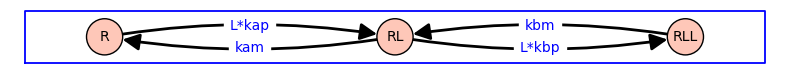

In [1]:
var('R RL RLL kap kam kbp kbm L')
G = DiGraph({R: {RL:kap*L}, RL: {R:kam, RLL:kbp*L}, RLL: {RL:kbm}})
pos = {R: (0, 0), RL: (2, 0), RLL: (4, 0)}
G.plot(figsize=8,edge_labels=True,pos=pos,graph_border=True,vertex_size=1000)

The receptor model's state-transition diagram (above) has the topology of a symmetdfdic directed [path graph](example_graphs:path_graph) on 3 vertices. 

The transition `R` to `RL` occurs at rate `kap*L` where `L` is ligand concentration and `kap` is an association rate constant with physical dimensions of {math}`\mbox{time}^{-1} \mbox{conc}^{-1}` where {math}`\mbox{conc}` is concentration (i.e., number density, {math}`\mbox{amount}/\mbox{length}^3`). The transition `RL` to `L` that involes unbinding of ligand is unimolecular, i.e., physical dimensions of rate ({math}`\mbox{time}^{-1}`).  The interpretation of the edge weights `kbp*L` and `kbm` are similar. 

```{note}
The characters `kap` and `kam` stand for {math}`k_a^+` and {math}`k_a^-` (`p` for plus and `m` for minus). Similarly for `kbp` and `kbm`. The product of a bimolecular rate constant and ligand concentration `kap*L` stands for {math}`k_a^+ [{\rm L}]` where {math}`{\rm L}` is a chemical species and the brackets indicate the concentration (number density) of that species. 
```

## Analysis of sequential binding 

As described in the section [Equilibrium Formalism](equilibrium_formalism), a straightforward algebraic calculation reveals that the steady-state fraction of receptors in each of the three states (`R`, `RL`, and `RLL`) is given by

In [2]:
z_R = kam*kbm; z_RL = kap*L*kbm; z_RLL = kap*L*kbp*L

z_T = z_R+z_RL+z_RLL

R = z_R/z_T; RL = z_RL/z_T; RLL = z_RLL/z_T

print('R   =',R); print('RL  =',RL); print('RLL =',RLL)

R   = kam*kbm/(L^2*kap*kbp + L*kap*kbm + kam*kbm)
RL  = L*kap*kbm/(L^2*kap*kbp + L*kap*kbm + kam*kbm)
RLL = L^2*kap*kbp/(L^2*kap*kbp + L*kap*kbm + kam*kbm)


## Plotting of a binding curve 

Using the above expressions, we can substitute values for the four rate constants and plot the resulting binding curve(s).  Each binding curve gives the fraction of receptors in a particular state (`R`, `RL`, `RLL`) as a function of ligand concentration (`L`)

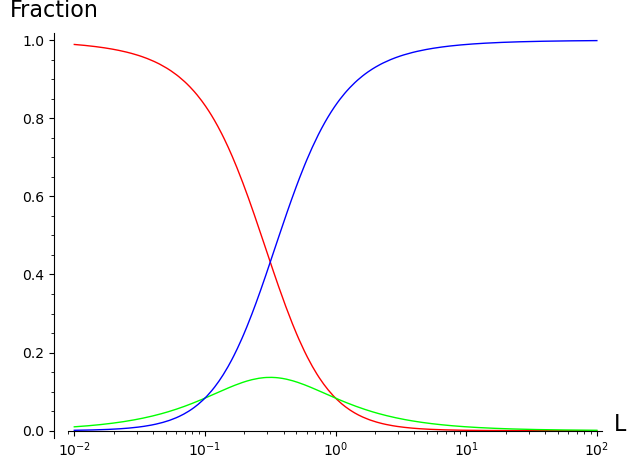

In [3]:
params = {kap:1,kam:1,kbp:10,kbm:1}
R = R.subs(params); RL = RL.subs(params); RLL = RLL.subs(params)

Lmin=0.01; Lmax=100;

pR   = plot_semilogx(R,  (L, Lmin, Lmax), rgbcolor=(1,0,0))
pRL  = plot_semilogx(RL, (L, Lmin, Lmax), rgbcolor=(0,1,0))
pRLL = plot_semilogx(RLL,(L, Lmin, Lmax), rgbcolor=(0,0,1), axes_labels=['L', 'Fraction'])

show(pR+pRL+pRLL)

At low ligand concentration most receptors are in the unbound form (`R`, red). At high concentrations most receptors are in the doubly bound form (`RLL`, blue).

The expressions being plotted above are

In [4]:
print('R   =',R); print('RL  =',RL); print('RLL =',RLL)

R   = 1/(10*L^2 + L + 1)
RL  = L/(10*L^2 + L + 1)
RLL = 10*L^2/(10*L^2 + L + 1)


Note that for any given ligand concentration, the fraction of receptors in each of the three states sums to 1.  This can be shown by asking Sagemath to solve for the values of `L` that satisfy `R+RL+RLL == 1`, as follows:

In [5]:
solve(R+RL+RLL == 1,L)

[L == L]

The answer indicates that `R+RL+RLL == 1` whenever `[L == L]`, that is, for any value of `L`.


## Equilibrium association constants

The receptor model presented above has the property that the fraction of receptors in each state satisfy detailed balance (i.e., for both reaction `a` and `b`, the forward and reverse rates balance.  As a consequence, the fraction of receptors in each state can be written in terms of the equilibrium association constants `ka=kap/kam` and `kb=kbp/kbm` which have physical dimensions of inverse concentration. 

To see this, divide the numberator and denominator of the expressions for `R`, `RL`, `RLL` by `kam*kbm` to obtain

In [6]:
var('ka kb')

z_R = 1; z_RL = ka*L; z_RLL = ka*L*kb*L; z_T = z_R+z_RL+z_RLL

R = z_R/z_T; RL = z_RL/z_T; RLL = z_RLL/z_T

print('R =',R,'','RL =',RL,'','RLL =',RLL)

R = 1/(L^2*ka*kb + L*ka + 1)  RL = L*ka/(L^2*ka*kb + L*ka + 1)  RLL = L^2*ka*kb/(L^2*ka*kb + L*ka + 1)


The filled circles on the plot below show that these expressions give the same three binding curves for `R`, `RL`, and `RLL` as a function of `L`.

R   = 1/(10*L^2 + L + 1)  RL  = L/(10*L^2 + L + 1)  RLL = 10*L^2/(10*L^2 + L + 1)


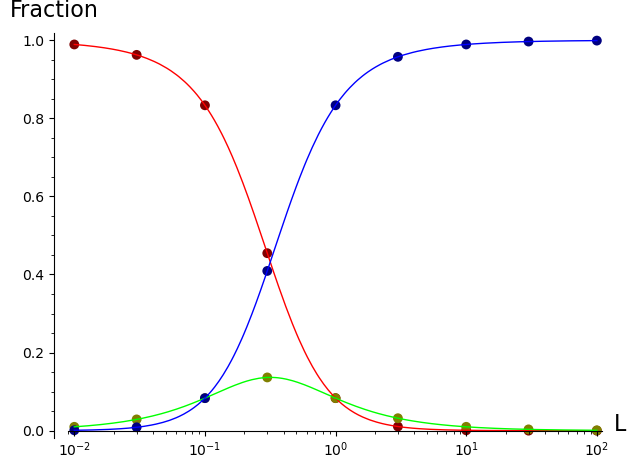

In [7]:
params = {ka:1,kb:10}
R = R.subs(params); RL = RL.subs(params); RLL = RLL.subs(params)
print('R   =',R,'','RL  =',RL,'','RLL =',RLL)

X = [0.01,0.03,0.1,0.3,1,3,10,30,100]

vReq = [(x, R(L=x)) for x in X]
pReq = points(vReq, rgbcolor=(0.5,0,0), pointsize=50)

vRLeq = [(x, RL(L=x)) for x in X]
pRLeq = points(vRLeq, rgbcolor=(0.5,0.5,0), pointsize=50)

vRLLeq = [(x, RLL(L=x)) for x in X]
pRLLeq = points(vRLLeq, rgbcolor=(0,0,0.5), pointsize=50)

show(pR + pRL + pRLL + pReq + pRLeq + pRLLeq)

## Equilibrium binding curves and arborescences

Receptor models and equilibrium binding curves can be compactly specified as an [arborescence](https://en.wikipedia.org/wiki/Arborescence_(graph_theory)) with directed edges (arcs) weighted by association constants and ligand concentrations. In graph theory, an arborescence is a directed graph having a distinguished vertex `u` (called the root) such that, for any other vertex `v`, there is exactly one directed path from `u` to `v`.

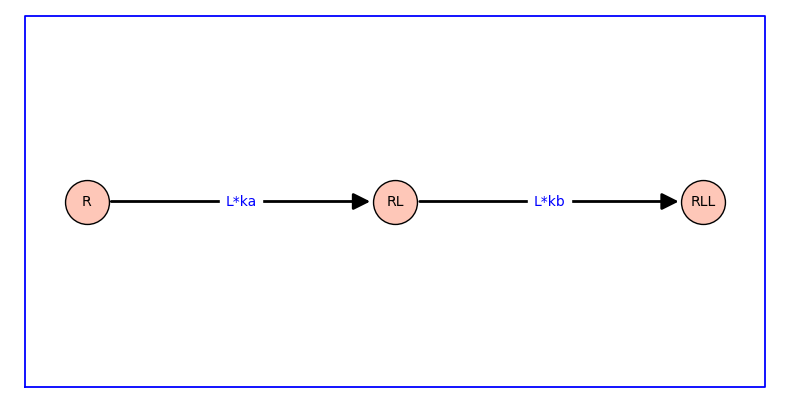

In [8]:
T = DiGraph({'R': {'RL':ka*L}, 'RL': {'RLL':kb*L}})
pos = {'R': (0, 0), 'RL': (2, 0), 'RLL': (4, 0)}
T.plot(figsize=8,edge_labels=True,pos=pos,graph_border=True,vertex_size=1000)

In the arborescence shown above, the root is state `R`. The edge label `ka*L` is the product of an equilibrium association constant `ka` and ligand concentration `L`, and similarly for reaction `b`.  Comparing to the diagram above, we see that `kappa_a = ka*L` and `kappa_b = kb*L`.

(equilibrium_binding_curves_and_rooted_spanning_trees)=
## Equilibrium binding curves and rooted spanning trees

An [arborescence](https://en.wikipedia.org/wiki/Arborescence_(graph_theory)) is a _rooted_ [spanning tree](https://en.wikipedia.org/wiki/Spanning_tree) of the state-transtion diagram with arrows reversed.

When specifying a receptor model and equilibrium binding curve as a rooted spanning tree, the orientation of the arcs specify the reverse direction of each tansition (reactant {math}`\leftarrow` product).

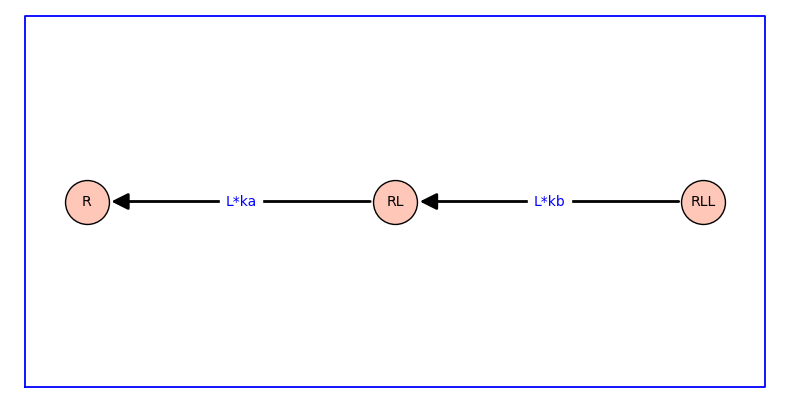

In [9]:
T = DiGraph({'RL': {'R':ka*L}, 'RLL': {'RL':kb*L}})
pos = {'R': (0, 0), 'RL': (2, 0), 'RLL': (4, 0)}
T.plot(figsize=8,edge_labels=True,pos=pos,graph_border=True,vertex_size=1000)

```{admonition} arborescence vs. rooted spanning tree
:class: tip

A receptor model and its equilibrium binding curve can be specifed either as an arborescence or a rooted spanning tree. The two approaches are equivalent.

However, the rooted spanning tree formulation is helpful in the analysis of conformation coupling of receptors. For this reason, in the sections that follow, we will specify receptor models as rooted spanning trees.
```